In [2]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as pltzx/x/
import seaborn as sns

In [3]:
# loading the data from the csv file to apandas dataframe
movies_data = pd.read_csv("movies.csv")

In [4]:
# printing the first 5 rows of the dataframe
movies_data.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
# number of rows and columns in the data frame

movies_data.shape

(4803, 24)

In [6]:
# selecting the relevant features for recommendation

selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [7]:
# replacing the null valuess with null string

for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [8]:
# combining all the 5 selected features

combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [9]:
print(combined_features)

0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [10]:
rating_data = movies_data[['title', 'vote_average']]  # Replace 'vote_average' with your rating column

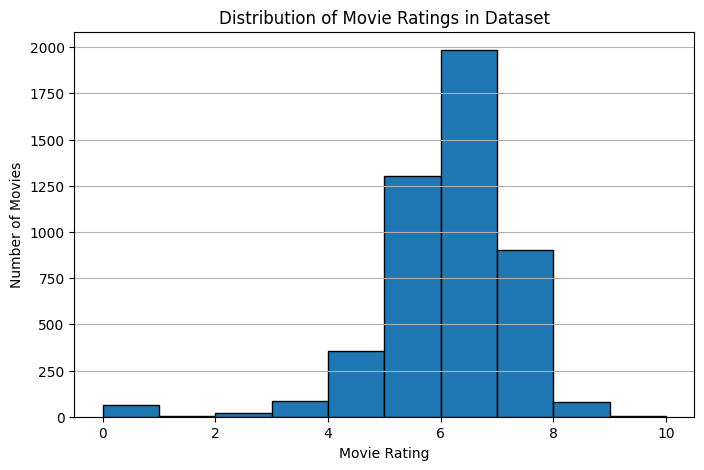

In [11]:
plt.figure(figsize=(8, 5))
plt.hist(rating_data['vote_average'], bins=10, edgecolor='black')
plt.xlabel('Movie Rating')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movie Ratings in Dataset')
plt.grid(axis='y')
plt.show()

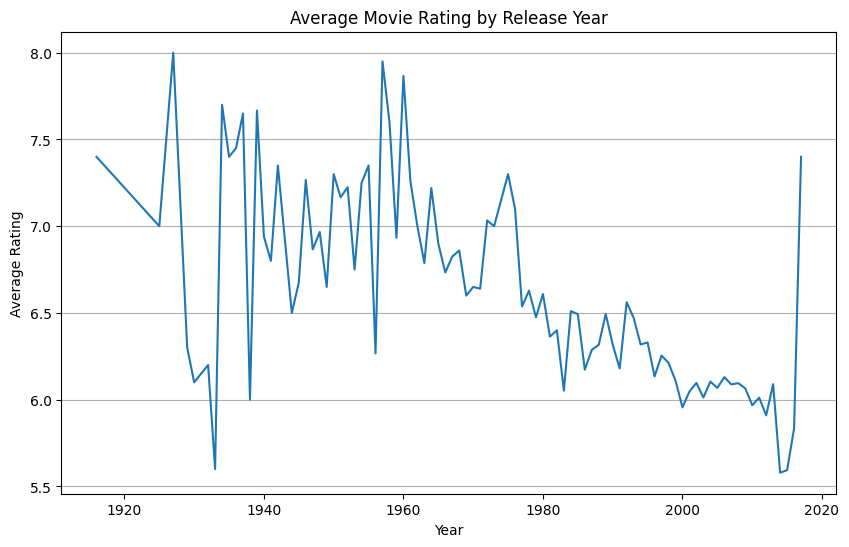

In [12]:
# Assuming movies_data has a 'release_date' column
movies_data['year'] = pd.to_datetime(movies_data['release_date']).dt.year
average_ratings_by_year = movies_data.groupby('year')['vote_average'].mean()  # Replace 'vote_average' with your rating column

plt.figure(figsize=(10, 6))
plt.plot(average_ratings_by_year.index, average_ratings_by_year.values)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating by Release Year')
plt.grid(axis='y')
plt.show()

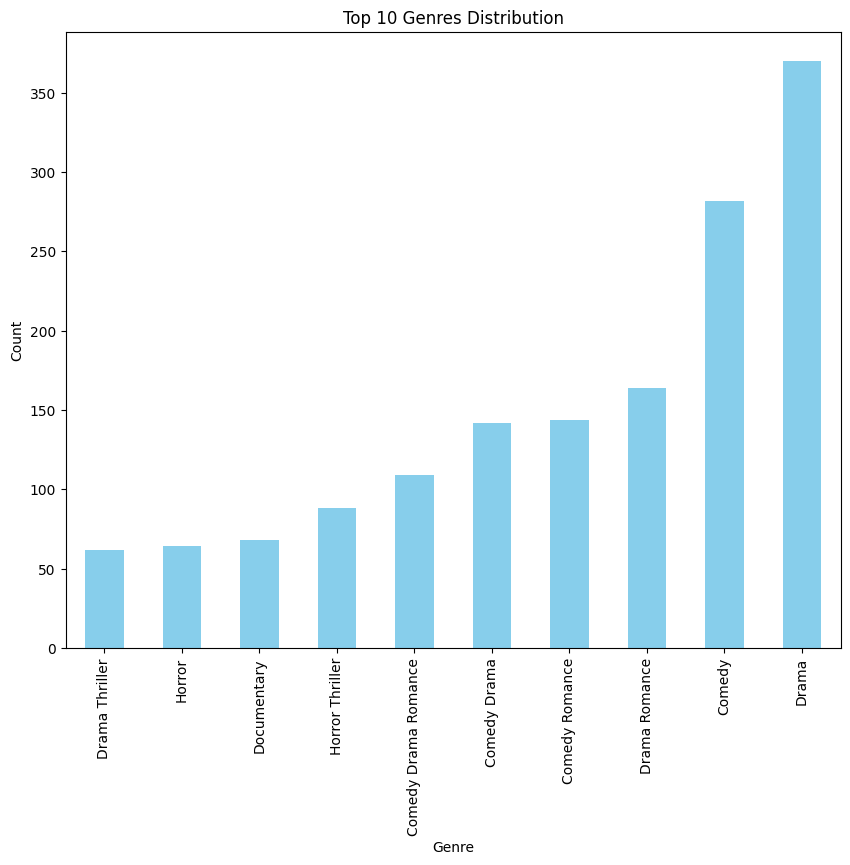

In [14]:
genre_count = movies_data['genres'].str.split('|', expand=True).stack().value_counts()
top_genres = genre_count.head(10)  # Select top 10 genres

plt.figure(figsize=(10, 8))
top_genres.sort_values().plot(kind='bar', color='skyblue')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.title('Top 10 Genres Distribution')
plt.show()


In [ ]:
# converting the text data to feature vectors

vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

In [ ]:
similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]


In [ ]:
print(similarity.shape)

(4803, 4803)


In [ ]:
movie_name = input('Enter your favorite movie name: ')

# Find close matches for the entered movie name
close_matches = difflib.get_close_matches(movie_name, movies_data['title'].tolist(), n=1)
close_match = close_matches[0] if close_matches else None

# If a close match is found, recommend similar movies
if close_match:
    index_of_the_movie = movies_data[movies_data['title'] == close_match].index[0]
    similarity_score = list(enumerate(similarity[index_of_the_movie]))
    sorted_similar_movies = sorted(similarity_score, key=lambda x: x[1], reverse=True)

    print('\nMovies suggested for you based on', close_match, ':\n')

    max_suggestions = 20  # Set the maximum number of suggestions to display
    for i, movie in enumerate(sorted_similar_movies, start=1):
        index = movie[0]
        title_from_index = movies_data.loc[index, 'title']
        if title_from_index != close_match:  # Exclude the original movie from suggestions
            print(i, '.', title_from_index)
            if i == max_suggestions:  # Break the loop when maximum suggestions are reached
                break
else:
  print('\nNo Movie Recommendation for', movie_name)



Movies suggested for you based on Wonderland :

2 . Kiss Kiss Bang Bang
3 . The Bad Lieutenant: Port of Call - New Orleans
4 . The Doors
5 . A Perfect Getaway
6 . Salton Sea
7 . Safe Men
8 . Win a Date with Tad Hamilton!
9 . Heist
10 . K-PAX
11 . The Face of an Angel
12 . Aroused
13 . Escobar: Paradise Lost
14 . Delgo
15 . Survivor
16 . Texas Rangers
17 . Clockwatchers
18 . Analyze That
19 . Amnesiac
20 . The Black Dahlia
